In [ ]:
import pickle
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
warnings.filterwarnings('ignore')

In [15]:
def load_data(
                class_dict = {
                            "L1" : 0,
                            "L2" : 1,
                            "L3" : 2,
                            "L4" : 3,
                            "L5" : 4,
                            },
                precedure_dict = {
                                'Excellent' : 0,
                                'Modorate' : 1,
                                'low' : 2,
                                'Poor' : 3
                                },
                security_dict = {
                                'very high' : 0,
                                'High' : 1,
                                'low' : 2,
                                'Modorate' : 3,
                                'Moderate' : 4,
                                'Low' : 5
                                },
                data_path = 'data/Financial_Data.xlsx'
                ):
    data = pd.read_excel(data_path)
    data.columns = [col.strip() for col in data.columns]
    del data['Project ID']

    data['Classification Level'] = data['Classification Level'].map(class_dict)
    data['Procedure'] = data['Procedure'].map(precedure_dict)
    data['Security'] = data['Security'].map(security_dict)

    Y = data['Classification Level']
    X = data.drop('Classification Level', axis=1)

    return X, Y

In [17]:
X, Y = load_data()
X_train, X_test, Y_train, Y_test = train_test_split(
                                                    X, Y, 
                                                    test_size=0.2, 
                                                    random_state=42
                                                    )
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (175, 15)
X_test shape: (44, 15)
Y_train shape: (175,)
Y_test shape: (44,)


In [22]:
rfc = RandomForestClassifier(
                            n_estimators=100, 
                            random_state=42
                            )
rfc.fit(X, Y)

RandomForestClassifier(random_state=42)

In [23]:
P_train = rfc.predict(X_train)
P_test = rfc.predict(X_test)

cls_report_train = classification_report(Y_train, P_train)
cls_report_test = classification_report(Y_test, P_test)

print(f"Train Classification Report:\n{cls_report_train}")
print(f"Test Classification Report:\n{cls_report_test}")

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        20

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         4

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1

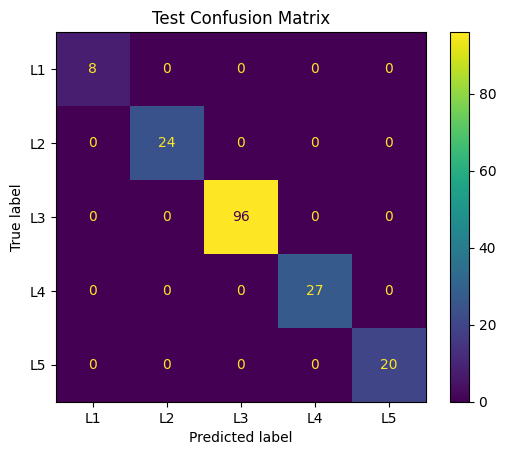

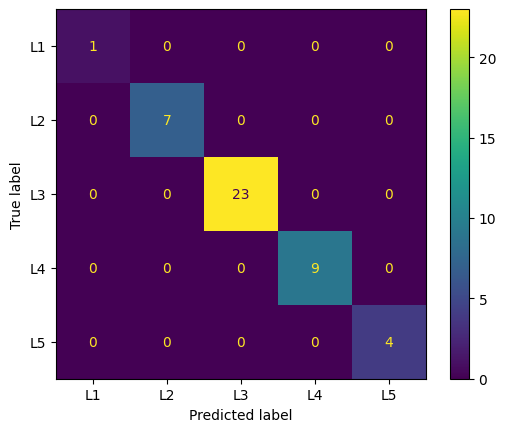

In [24]:
cm_train = confusion_matrix(Y_train, P_train)
cm_test = confusion_matrix(Y_test, P_test)

disp = ConfusionMatrixDisplay(
                            confusion_matrix = cm_train,
                            display_labels = ['L1', 'L2', 'L3', 'L4', 'L5']
                            )               
disp.plot()

disp = ConfusionMatrixDisplay(
                            confusion_matrix = cm_test,
                            display_labels = ['L1', 'L2', 'L3', 'L4', 'L5']
                            )                  
plt.title('Test Confusion Matrix') 
disp.plot()

In [26]:
with open('artifacts/financial_cls.pkl', 'wb') as f:
    pickle.dump(rfc, f)

### Inference

In [27]:
with open('artifacts/financial_cls.pkl', 'rb') as f:
    rfc = pickle.load(f)

In [32]:
def inference_finance(
                    sample_json,
                    precedure_dict = {
                                    'Excellent' : 0,
                                    'Modorate' : 1,
                                    'low' : 2,
                                    'Poor' : 3
                                    },
                    security_dict = {
                                    'very high' : 0,
                                    'High' : 1,
                                    'low' : 2,
                                    'Modorate' : 3,
                                    'Moderate' : 4,
                                    'Low' : 5
                                    },
                    class_dict_rev = {
                                    0 : "L1",
                                    1 : "L2",
                                    2 : "L3",
                                    3 : "L4",
                                    4 : "L5"
                                    }
                    ):
    sample = pd.DataFrame(sample_json, index=[0])
    sample['Procedure'] = sample['Procedure'].map(precedure_dict)
    sample['Security'] = sample['Security'].map(security_dict)
    pred = rfc.predict(sample)[0]
    return class_dict_rev[int(pred)]

In [33]:
sample_json = {
            "Total":1426600.0,
            "utility costs":45000.0,
            "hardware cost":380000.0,
            "Software costs":701600.0,
            "Budget":300000.0,
            "Additional Costs":0.0,
            "man hours":600.0,
            "Project Plan(weeks)":12.0,
            "Procedure":"Excellent",
            "Security":"very high",
            "Resourses":8.0,
            "Investment":1355007.5700000001,
            "Resource Utilization Efficiency (%)":94.18,
            "Plan Compliance (%)":82.44,
            "Cost Per Resource":178325.0
            }

In [34]:
inference_finance(sample_json)

'L2'